# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset contains **1500 rows and 8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- `booking_id`: Same as description without missing values.
- `months_as_member`: Same as description without missing values.
- `weight`: Same as description. 20 missing values. Replaced missing values with the overall average weight.
- `days_before`: Values don't match the description. No missing values. I cleaned values by using regular expression pattern and converted into int64 data type.
- `day_of_week`: Values don't match the description. No missing values. I cleaned values by extracting first 3 characters from a string.
- `time`: Same as description without missing values.
- `category`: Values don't match the description. No missing values. I replaced values `-` to `unknown`.
- `attended`: Same as description without missing values.

### Original Dataset

In [307]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fitness_class_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [308]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [309]:
def variable_check(df):
    new_line = '\n'
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'''
Column: {col} | Type: {df[col].dtype}{new_line}
Number of unique values: {df[col].nunique()}{new_line}
Number of missing values: {df[col].isna().sum()}{new_line}
Unique values:{df[col].unique()}{new_line}
{'-' * 60}
            ''')
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            print(f'''
Column: {col} | Type: {df[col].dtype}{new_line}
Number of unique values: {df[col].nunique()}{new_line}
Number of missing values: {df[col].isna().sum()}{new_line}
Unique values: {df[col].unique()}{new_line}
Min value: {min(df[col])}
{'-' * 60}
            ''')

### Validate variables

In [310]:
variable_check(df)


Column: booking_id | Type: int64

Number of unique values: 1500

Number of missing values: 0

Unique values: [   1    2    3 ... 1498 1499 1500]

Min value: 1
------------------------------------------------------------
            

Column: months_as_member | Type: int64

Number of unique values: 72

Number of missing values: 0

Unique values: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]

Min value: 1
------------------------------------------------------------
            

Column: weight | Type: float64

Number of unique values: 1241

Number of missing values: 20

Unique values: [79.56 79.01 74.53 ... 87.38 68.64 94.39]

Min value: 55.41
------------------------------------------------------------
            

Column: days_before | Type:

### Clean Rating and Review columns

In [311]:
# create a copy of the dataframe
df_clean = df.copy()

# Replace missing values with the overall average weight
df_clean['weight'].fillna((df_clean['weight'].mean()), inplace=True)

# Checking missing values
df_clean['weight'].isna().sum()

0

In [312]:
# clean the days_before variable
df_clean['days_before'] = df_clean['days_before'].str.extract('(\d+)').astype(int)
df_clean['days_before'].unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [313]:
# clean day_of_week variable
df_clean['day_of_week'] = df_clean['day_of_week'].str[:3]
df_clean['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [314]:
# clean category variable
df_clean['category'] = df_clean['category'].replace({'-':'unknown'})
df_clean['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'unknown', 'Aqua'],
      dtype=object)

## Task 2
From **Graph 1: Count of Bookings that Attended the Class**, most of the members did not attend the class. And observations are not balanced. About 70% of the observations did not attend the class whilst about 30% attended the class.

### Inspecting the Attended variable

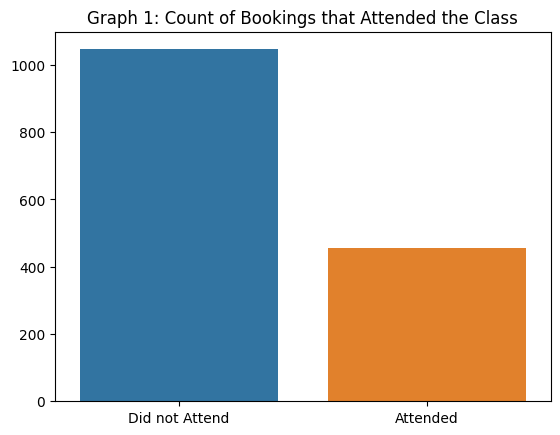

In [315]:
# visualization that shows how many bookings attended the class

sns.countplot(data=df_clean, x='attended')
plt.xticks([0, 1], ['Did not Attend', 'Attended'])
plt.title('Graph 1: Count of Bookings that Attended the Class')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Task 3
From **Graph 2: Density Plot of Number of Months as a Member**, the distribution of the number of months as a member's column is right skewed i.e., the frequency data is not normally distributed. The data is clustered at the left end and has a long tail that extends towards the right.

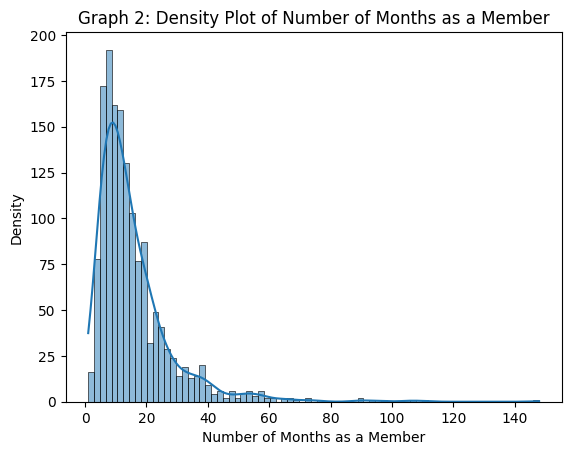

In [316]:
# visualization to describe the distribution of the months as a member variable

sns.histplot(df_clean['months_as_member'], kde=True)
plt.ylabel('Density')
plt.xlabel('Number of Months as a Member')
plt.title('Graph 2: Density Plot of Number of Months as a Member')
plt.show()

## Task 4
From **Graph 3: Attendance vs Number of Months as a Member**, the higher number of months as a fitness club member, the higher the attendance percentage

Text(0.5, 1.0, 'Graph 3: Attendance vs Number of Months as a Member')

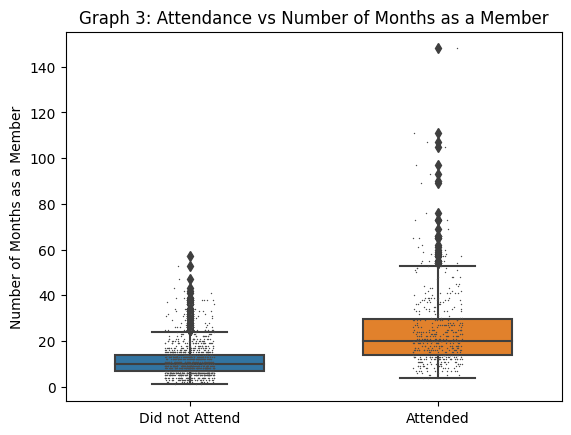

In [317]:
# Visualization to show the relationship between attendance and number of months as a member

sns.boxplot(x="attended", y="months_as_member", data=df_clean, width=.6)
sns.stripplot(x="attended", y="months_as_member", data=df_clean, size=1, color=".3", linewidth=0)
plt.ylabel('Number of Months as a Member')
plt.xlabel('')
plt.xticks([0, 1], ['Did not Attend', 'Attended'])
plt.title('Graph 3: Attendance vs Number of Months as a Member')

## Task 5
Predicting whether member will attend the class or not is a **binary classification problem** in machine learning.

### Preprocessing

In [318]:
# features encoding

from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
df_clean['time'] = le_cat.fit_transform(df_clean['time'])
df_clean['day_of_week'] = le_cat.fit_transform(df_clean['day_of_week'])
df_clean['category'] = le_cat.fit_transform(df_clean['category'])
X = df_clean.drop(columns = ['booking_id', 'attended'])
cat_features = ['time', 'category', 'day_of_week']
# X = pd.get_dummies(features, columns = ['day_of_week', 'category'])
y = df_clean['attended'].copy()

In [319]:
X.head()

,months_as_member,weight,days_before,day_of_week,time,category
0,17,79.56,8,6,1,3
1,10,79.01,2,1,0,2
2,16,74.53,14,3,0,3
3,5,86.12,10,0,0,1
4,15,69.29,8,4,0,2


In [320]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: int64

In [321]:
# spliting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023, stratify = y)

## Task 6
As a baseline model I chose random forest classifier.

In [322]:
# import RandomForestClassifier to build baseline model

from sklearn.ensemble import RandomForestClassifier

# fit baseline model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Task 7
As a comparison model I chose CatBoost Classifier.

In [323]:
# import CatBoostClassifier as comparison model

from catboost import CatBoostClassifier

clf = CatBoostClassifier(cat_features=cat_features)
clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

Learning rate set to 0.033149
0:	learn: 0.6768877	test: 0.6765488	best: 0.6765488 (0)	total: 48.7ms	remaining: 48.7s
150:	learn: 0.4058141	test: 0.4600160	best: 0.4600160 (150)	total: 3.07s	remaining: 17.3s
300:	learn: 0.3497328	test: 0.4653792	best: 0.4591435 (168)	total: 6.17s	remaining: 14.3s
450:	learn: 0.3043479	test: 0.4706655	best: 0.4591435 (168)	total: 9.31s	remaining: 11.3s
600:	learn: 0.2705751	test: 0.4734766	best: 0.4591435 (168)	total: 12.5s	remaining: 8.27s
750:	learn: 0.2349892	test: 0.4755183	best: 0.4591435 (168)	total: 15.7s	remaining: 5.2s
900:	learn: 0.2104698	test: 0.4856114	best: 0.4591435 (168)	total: 18.7s	remaining: 2.06s
999:	learn: 0.1964928	test: 0.4896463	best: 0.4591435 (168)	total: 20.9s	remaining: 0us

bestTest = 0.4591435009
bestIteration = 168

Shrink model to first 169 iterations.


## Task 8
I chose the **RandomForest Classifer** as a baseline model it gives accurate and precise results compared to many other models. The comparison model I am choosing is the **CatBoost Classifier** model because compared to RandomForest Classifier it is designed for categorical data and is known to have the best performance on it.

## Task 9
CatBoost Classifier has better F1 score.

In [324]:
from sklearn.metrics import f1_score

y_pred = rf_model.predict(X_test)
print(f'\n Random Forest F1 score: {f1_score(y_test, y_pred): .3f}')

y_pred = clf.predict(X_test)
print(f'\n CatBoost F1 score: {f1_score(y_test, y_pred): .3f}')


 Random Forest F1 score:  0.538

 CatBoost F1 score:  0.564


## Task 10
The F1 score of CatBoost Classifier on test set is 0.564 and the F1 score of Random Forest Classifier is 0.55. That means that CatBoost Classifier model predict more correctly on imbalanced ratios.
This is possible probably because the CatBoost Classifier is designed for categorical data and is known to have the best performance on it.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam